In [1]:
#Importando as bibilotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#Upload do arquivo
from google.colab import files
arq = files.upload()

Saving anime.csv to anime.csv


In [4]:
#Criando o DataFrama
df = pd.read_csv("anime.csv")

In [6]:
#Visualizando as 5 primeiras linhas
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
#Quantidade de linhas e colunas
df.shape

(12294, 7)

In [56]:
#Verificando os tipos de dados
df.dtypes

AnimeID            int64
Nome              object
Genero            object
Tipo              object
Episodios         object
Classificacao    float64
Membros            int64
dtype: object

In [20]:
#alterando os nomes das colunas para melhor entendimento
df = df.rename(columns={"anime_id":"AnimeID", "name":"Nome", "genre":"Genero", "type":"Tipo", "episodes":"Episodios", "rating":"Classificacao","members":"Membros" })

In [22]:
df.sample(10)

,AnimeID,Nome,Genero,Tipo,Episodios,Classificacao,Membros
8609,20755,Ganbare! Lulu Lolo,"Kids, Slice of Life",TV,26,6.13,134
901,1008,Ranma ½ Specials,"Comedy, Drama, Romance, Shounen",OVA,2,7.78,11084
3424,5830,Tsurupika Hagemaru-kun,"Comedy, Kids",TV,59,7.00,322
2007,9013,Kuruneko Season 2,"Comedy, Slice of Life",TV,49,7.38,675
2086,8424,MM!,"Comedy, Ecchi, Harem, School",TV,12,7.36,129672
7827,28831,Anomalies,Psychological,Special,1,4.91,238
5905,3877,Sasurai no Shoujo Nell,"Adventure, Historical, Shoujo",TV,26,6.32,356
11804,2436,Angelium,Hentai,OVA,2,6.06,3395
7444,1075,Netrun-mon the Movie,Comedy,OVA,1,5.42,961
8381,28829,Cinterrier-jou no Hanamuko,"Comedy, Fantasy, Kids",Movie,1,3.62,117


In [24]:
#Visualizando as colunas exixtentes e seus tipos
df.columns

Index(['AnimeID', 'Nome', 'Genero', 'Tipo', 'Episodios', 'Classificacao',
       'Membros'],
      dtype='object')

In [27]:
df.describe()

,AnimeID,Classificacao,Membros
count,"12,294.00","12,064.00","12,294.00"
mean,"14,058.22",6.47,"18,071.34"
std,"11,455.29",1.03,"54,820.68"
min,1.00,1.67,5.00
25%,"3,484.25",5.88,225.00
50%,"10,260.50",6.57,"1,550.00"
75%,"24,794.50",7.18,"9,437.00"
max,"34,527.00",10.00,"1,013,917.00"


In [26]:
#Formatando documentação para melhor visualização de numero quebrado(Float)
pd.options.display.float_format = '{:20,.2f}'.format

In [33]:
#Qual é o anime que tem a maior comunidade ?
df.groupby('Nome')['Classificacao'].mean()


Nome
&quot;0&quot;                                                                      5.06
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu                   5.00
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi                                7.06
&quot;Bungaku Shoujo&quot; Memoire                                                 7.54
&quot;Bungaku Shoujo&quot; Movie                                                   7.63
                                                                           ...         
xxxHOLiC Rou                                                                       8.32
xxxHOLiC Shunmuki                                                                  8.17
Üks Uks                                                                            6.17
ēlDLIVE                                                                             NaN
◯                                                                                  4.22
Name: Classificacao, Length

In [46]:
#Verificando se contém números ausentes em nossa base
df.isnull().sum()

AnimeID            0
Nome               0
Genero             0
Tipo               0
Episodios          0
Classificacao    193
Membros            0
dtype: int64

In [36]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Genero'], inplace=True)

In [38]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Tipo'], inplace=True)

In [43]:
#Qual a média de classificação de todos animes ? 
df['Classificacao'].mean()

6.478264125821752

In [45]:
#Apagando linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

In [47]:
#nlarget -- TOP 3 com maiores Classificações
df.nlargest(3,'Classificacao')

,AnimeID,Nome,Genero,Tipo,Episodios,Classificacao,Membros
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62


In [49]:
#nsamllest -- TOP  3 piores Classificações
df.nsmallest(3, 'Classificacao')

,AnimeID,Nome,Genero,Tipo,Episodios,Classificacao,Membros
9991,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",Special,1,1.67,51
12258,20007,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",Movie,1,1.92,129
8058,3287,Tenkuu Danzai Skelter+Heaven,"Mecha, Sci-Fi",OVA,1,2.00,7680


In [61]:
#Agrupamento por Classificação por tipo
df.groupby('Tipo')['Classificacao'].mean()

Tipo
Movie                     6.33
Music                     5.59
ONA                       5.65
OVA                       6.38
Special                   6.52
TV                        6.90
Name: Classificacao, dtype: float64

In [62]:
#Agrupamento por Classificação por tipo
df.groupby('Genero')['Classificacao'].mean()

Genero
Action                                                                    5.82
Action, Adventure                                                         6.19
Action, Adventure, Cars, Comedy, Sci-Fi, Shounen                          6.87
Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports                   6.46
Action, Adventure, Cars, Sci-Fi                                           6.86
                                                                  ...         
Super Power, Supernatural, Vampire                                        4.76
Supernatural                                                              5.56
Thriller                                                                  6.51
Vampire                                                                   4.24
Yaoi                                                                      5.64
Name: Classificacao, Length: 3260, dtype: float64

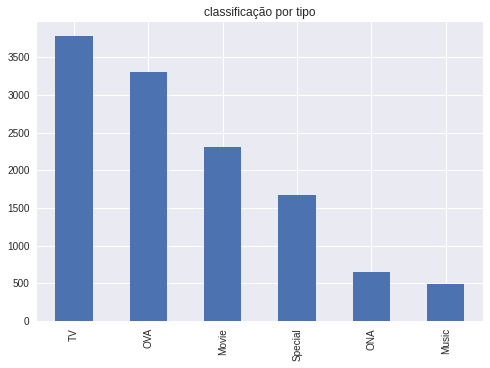

In [66]:
#Gráfico de barras
df['Tipo'].value_counts(ascending=False).plot.bar(title='classificação por tipo');

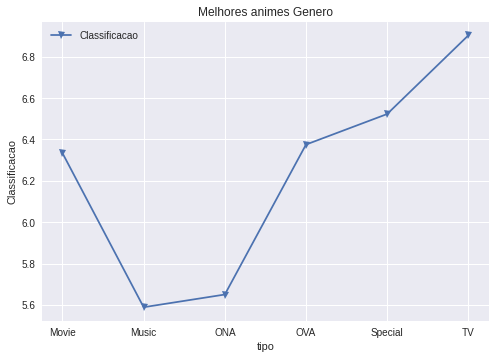

In [75]:
df.groupby(df['Tipo'])['Classificacao'].mean().plot(marker ='v',title= 'Melhores animes Genero');
plt.xlabel('tipo');
plt.ylabel('Classificacao');
plt.legend();

plt.savefig("melhores_animes_tipo.png")


In [ ]:
#Salvando em PNG

plt.savefig("grafico QTDEx MES.png")
